# Go for Python Developers

Python Savchenko, Python at Gaming Innovation Group

25th February 2020



## Agenda

* Intro to Go
* Features
* Go Basics
* Python or Go
* Making the case for Go
* References

# Intro to Go

![image.png](resources/gopher-sketch.png)

In this section, I'll introduce Go, through the eyes of full-time Python dev team

### Intro - Our Story

* During rewrite of a legacy project
* Started during RND Days
* Fast out of the box and forgiving to coding mistakes
* The Python team is now also doing Go!

- my personal experience with chosing Go
- performance critical service; for the 3rd time, from php to python3 w/ cython,
- RND days = low risk experimentation
- team in Marbella, moved from node to go: requires less expertise to make performant
- the backend devs got the basics relatively fast

### Intro - Go History

Created in 2007 at Google

by Ken Thompson, Rob Pike and Robert Greisman

(UNIX, Plan9, Bell Labs, C, V8)

Story has it that while working on a large web server application written in C++ at Google,
waiting for it to build for 45 minutes, these well established software engineers with
language design experience, went on a rant how and why C++ is slow at this, and what
they actually wanted from a language to solve their current problem.

### Intro - Projects using Go

* Docker
* Kubernetes
* Prometheus
* InfluxDB

https://github.com/golang/go/wiki/Projects, https://github.com/avelino/awesome-go

A number of projects decided to use Go, some became popular, which in turn made the language popular

While popular with "systems developers", people have gone way beyound:

Web-developers (fasthttp, gorilla), Embedded/IOT (tinygo), Computer vision (gocv), Machine Learning, Game development, Desktop and mobile GUI (fyne)

### Intro - Go code

In [13]:
package main

import "fmt"

func main() {
    people := "PyMalta Meetup Attendees"
    fmt.Printf("Hello %s!", people)
}
main()  // automatically invoked when running the binary

Hello PyMalta Meetup Attendees!

## Features

### My Favorite Features

- Fast compiler
- Minimal language spec
- Excellent tooling
- Easy concurrency w/ goroutines
- "Duck typing" through interfaces

### Fast Compiler

_Somewhat faster_ than C++/C/Rust with **few dependencies**

For our relatively simple web application, written in both python and go, it takes less time to compile and run than to start python (which could take seconds without cache).


### Fast Compiler

_Miles faster_ than C++/C/Rust with **many dependencies**

> Go provides a model for software construction that makes dependency analysis easy and avoids much of the overhead of C-style include files and libraries

in short: a rigid code-style results in simple dependency gathering + no dependency cycles

<span class="footnote">Ref: https://talks.golang.org/2012/splash.article#TOC_5.</span>

### Fast Compiler

<video controls src="resources/The Go Programming Language-rKnDgT73v8s-compile-demo.mp4">


Note this video is from 2009, 2 years after creating it. This is no side effect, the compiler is fast by design

### Features - Minimal language spec

```
break       else         import     struct
case        fallthrough  interface  switch
chan        for          map        type
const       func         package    var
continue    go           range
default     goto         return
defer       if           select
```

Ref: https://golang.org/ref/spec

Go has very "small surface area", these are all the reserved words

### Excellent Tooling

* go get
* go doc
* go test
* go fmt
* go vet

#### example of `go get`


```go
$ go get github.com/google/codesearch/regexp

$ ls -la $GOPATH/src/github.com/google/codesearch/regexp/
.rw-r--r-- 4.8k pavel.savchenko 25 Feb 16:54 copy.go
.rw-r--r--  10k pavel.savchenko 25 Feb 16:54 match.go
.rw-r--r-- 1.5k pavel.savchenko 25 Feb 16:54 regexp.go
.rw-r--r-- 5.2k pavel.savchenko 25 Feb 16:54 regexp_test.go
.rw-r--r-- 5.7k pavel.savchenko 25 Feb 16:54 utf.go
```

#### Example of `go doc`

```bash
$ go doc github.com/google/codesearch/regexp                                                                           
package regexp // import "github.com/google/codesearch/regexp"

Package regexp implements regular expression search tuned for use in
grep-like programs.

type Grep struct{ ... }
type Regexp struct{ ... }
    func Compile(expr string) (*Regexp, error)

$ go doc github.com/google/codesearch/regexp Regexp
package regexp // import "github.com/google/codesearch/regexp"

type Regexp struct {
	Syntax *syntax.Regexp

	// Has unexported fields.
}
    Regexp is the representation of a compiled regular expression. A Regexp is
    NOT SAFE for concurrent use by multiple goroutines.

func Compile(expr string) (*Regexp, error)
func (r *Regexp) Match(b []byte, beginText, endText bool) (end int)
func (r *Regexp) MatchString(s string, beginText, endText bool) (end int)
func (re *Regexp) String() string
```

#### Example of `go test`

```go
$ cd github.com/google/codesearch/regexp
$ go list
github.com/google/codesearch/regexp
$ go test -v
=== RUN   TestNstateEnc
--- PASS: TestNstateEnc (0.00s)
=== RUN   TestMatch
--- PASS: TestMatch (0.00s)
=== RUN   TestGrep
--- PASS: TestGrep (0.00s)
PASS
ok  	github.com/google/codesearch/regexp	0.018s
```

## Go Basics

* Variables
* Loops
* Conditions
* Error handling
* Concurrency

### Variables

* Variables
* Numeric Types
* Array/Slice/Map Types
* String Types
* Types and interfaces
* Structs
* Channels
* Testing

#### Numeric Types

```
uint8    unsigned  8-bit integers (0 to 255)
float32  IEEE-754 32-bit floating-point numbers

uint     either 32 or 64 bits
int      same size as uint
byte     alias for uint8
```

#### Array/Slice/Map Types

In [14]:
var a [4]byte
b := [32]byte{0, 1, 2}
c := []byte{}
d := map[int]string{1: "first", 2: "second"}

fmt.Printf("a: %T, b: %T, c: %T, d: %T\n\n", a, b, c, d)

c := append(c, 42)
d[3] = "third"
fmt.Printf("c: %v, d: %v", c, d)

a: [4]uint8, b: [32]uint8, c: []uint8, d: map[int]string

c: [42], d: map[1:first 2:second 3:third]

41 <nil>

#### String Types

Strings are immutable sequences of bytes (implicitly UTF-8 encoded)

In [15]:
var a string = "easy"
b := `A raw string`

fmt.Printf("a: %T, b: %T", a, b)

// append(b, "sdfsdf")  -> will raise panic:
// repl.go:6:8: first argument to append must be slice; have <string>

a: string, b: string

20 <nil>

#### Types and interfaces

In [ ]:
type Thing interface {
    Do() error
}

var x interface{}  // x is nil and has static type interface{}
var v *Thing       // v has value nil, static type *Thing
x = 42             // x has value 42 and dynamic type int
x = v              // x has value (*T)(nil) and dynamic type *Thing

#### Structs

In [ ]:
// A struct with 6 fields.
type Mix struct {
    x, y int
    u float32
    _ float32  // padding
    A *[]int
    F func()
}

func (m *Mix) Do() error {
    fmt.Printf("I do my thing")
}

var m map[string]Mix

#### Channels

In [ ]:
var c1 chan Thing      // can be used to send and receive values of type Thing
var c2 chan<- float64  // can only be used to send float64s
var c3 <-chan int      // can only be used to receive ints

### Loops

* tl;dr just use `for` to loop everything

#### The traditional `for` loop

In [17]:
import "fmt"

for i := 0; i < 10; i++ {
    fmt.Printf("hi %d, ", i)
}

hi 0, hi 1, hi 2, hi 3, hi 4, hi 5, hi 6, hi 7, hi 8, hi 9, 

#### Single condition `for` loop (i.e a while loop)

In [18]:
import "fmt"

var i = 10

for i > 0 {
    fmt.Printf("hi %d, ", i)
    i -= 2
}

hi 10, hi 8, hi 6, hi 4, hi 2, 

#### A `for` loop with `range` statement

In [19]:
import "fmt"

// var key string
// var val interface {}  // element type of m is assignable to val

days := map[string]int{"mon":0, "tue":1, "wed":2, "thu":3, "fri":4, "sat":5, "sun":6}

for key, val := range days {
    fmt.Printf("Day: %s, Index: %d\n", key, val)
}

Day: sat, Index: 5
Day: sun, Index: 6
Day: mon, Index: 0
Day: tue, Index: 1
Day: wed, Index: 2
Day: thu, Index: 3
Day: fri, Index: 4


#### An infinite loop (no conditions)

In [ ]:
import (
    "time"
    "fmt"
)

for {
    fmt.Print(".")
    time.Sleep(time.Second)
}

........

### Conditions

#### If statement

In [1]:
import (
    "math/rand"
    "fmt"
)

fmt.Printf(func () string {
    y := rand.Intn(3)
    if x := rand.Intn(3); x < y {
        return "x is smaller than y"
    } else if x > y {
        return "x is bigger than y"
    } else {
        return "x and y are equal"
    }    
}())

x is smaller than y

19 <nil>

#### Switch statement

In [ ]:
import "time"

switch time.Now().Weekday() {
case time.Saturday:
    fmt.Println("Today is Saturday.")
case time.Sunday:
    fmt.Println("Today is Sunday.")
default:
    fmt.Println("Today is a weekday.")
}

### Error handling

```go
type error interface {
	Error() string
}
```

For example

```go
func Read(f *File, b []byte) (n int, err error)
```

In [ ]:
import (
    "fmt"
    "os"
)

f, err := os.Open("./aintnofile")
if err != nil {
    fmt.Printf("Ooops! %s", err)
}

### Goroutines

#### Start any function as a goroutine with `go`

In [27]:
import "time"
func f(from string) {
    for i := 0; i < 3; i++ {
        fmt.Println(from, ":", i)
        time.Sleep(time.Millisecond * 200)
    }
}
go f("my goroutine")
f("direct")

direct : 0
my goroutine : 0
direct : 1
my goroutine : 1
direct : 2
my goroutine : 2


#### Channels

In [28]:
func numberGen(start, count int, out chan<- int) {
    for i := 0; i < count; i++ {
        out <- start + i
    }
    close(out)
}
func printNumbers(in <-chan int, done chan<- bool) {
    for num := range in {
        fmt.Printf("%d\n", num)
    }
    done <- true
}
numberChan := make(chan int)
done := make(chan bool)
go numberGen(1, 10, numberChan)
go printNumbers(numberChan, done)

<-done

1
2
3
4
5
6
7
8
9
10


true true

### Testing

In [ ]:
import "testing"

func IntMin(a, b int) int {
    if a < b {
        return a
    } else {
        return b
    }
}

func TestIntMinBasic(t *testing.T) {
    ans := IntMin(2, -2)
    if ans != -2 {

        t.Errorf("IntMin(2, -2) = %d; want -2", ans)
    }
}

#### Testify provides Unit Testing interface

In [ ]:
import (
  "testing"
  "github.com/stretchr/testify/assert"
)

func TestSomething(t *testing.T) {

  var a string = "Hello"
  var b string = "Hello"

  assert.Equal(t, a, b, "The two words should be the same.")

}

## Python or Go

### Which should you use?

![image.png](resources/go-or-python.jpg)

### Should I just use Go for everything?

```bash
$ pip install youtube-dl
Collecting youtube-dl
  Downloading youtube_dl-2020.2.16-py2.py3-none-any.whl (1.8 MB)
     |████████████████████████████████| 1.8 MB 793 kB/s
Installing collected packages: youtube-dl
Successfully installed youtube-dl-2020.2.16

$ youtube-dl "https://youtu.be/rKnDgT73v8s?t=568"
[youtube] rKnDgT73v8s: Downloading webpage
[youtube] rKnDgT73v8s: Downloading video info webpage
WARNING: Requested formats are incompatible for merge and will be merged into mkv.
[download] Destination: The Go Programming Language-rKnDgT73v8s.f136.mp4
[download] 100% of 155.63MiB in 00:22
```

https://github.com/ytdl-org/youtube-dl

### Comparing - Which should you use?

**My own super personal opinion**

| For                   | I prefer   |
| --------------------- | ---------- |
| rapid prototyping     | Python     |
| CLI tools/scripting   | Python     |
| ML / Scientific       | Python     |
| IO bound concurrency  | Python/Go  |
| CPU bound concurrency | Go         |
| Critical Performance  | Go         |
| Memory constrainted   | Go         |

### Comparing

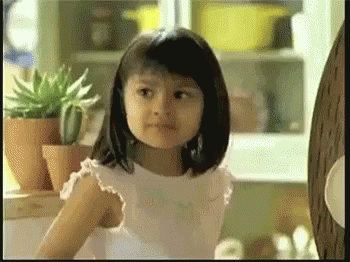

## Making the case for Go

* Experiment during RND days / weekends
* Try on a new project or a legacy rewrite
* Pick a small enough (micro-) service to reduce risk

### Convincing Colleagues

* Present a working proof of concept
* Provide ways to learn and share knowledge
* Give internal talks about less-trivial material
* Talk to another team that switched to Go

### Convincing Management

* Present the right business case, e.g:
 * reduced costs compared to counterparts
 * scaling is easier when you start ahead
* Not likely to go away or become unpopular any time soon (Google, Docker)
* If at first you don't succeed, try again
* Ask for forgiveness, rather than permission

## References

### Resources - Courses

https://tour.golang.org/welcome/1 - mandatory _"quick"_ tutorial

https://gobyexample.com/ - annotated examples

https://gophercises.com/ - hands-on real-life tasks: more demanding, but IMO the right way to do it

https://www.youtube.com/watch?v=YS4e4q9oBaU - video via freecodecamp (6h 40m)

https://pythonprogramming.net/go/introduction-go-language-programming-tutorial/ - sentdex text & video (<2h)

### Resources - Books

https://www.golang-book.com/books/intro - a free online book

http://www.gopl.io/ - The Go Programming Language by Donovan & Kernighan

https://github.com/dariubs/GoBooks#books - more books

### Resources - Talks

Rob Pike - The Go Programming Language - https://youtu.be/rKnDgT73v8s

Rob Pike - Simplicity is Complicated https://youtu.be/rFejpH_tAHM

Robert Griesemer - The Evolution of Go https://youtu.be/0ReKdcpNyQg

The inspiration for this talk: https://youtu.be/AVxosSFzq5s

### Resources - Misc

**Blogs**

* https://dave.cheney.net/2014/06/07/five-things-that-make-go-fast
* https://rakyll.org/
* https://www.calhoun.io/
* http://devs.cloudimmunity.com/gotchas-and-common-mistakes-in-go-golang/

### Resources - Misc #2

**Youtube**

https://www.youtube.com/c/justforfunc/

**Chat**

https://invite.slack.golangbridge.org/